# Deep Neural Networks with TensorFlow [Sequential vs Functional API]

- We'll be using the Fashion MNIST Dataset (Clothing Classification)
- The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.
- It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. - The mapping of all 0-9 integers to class labels is listed below.
    - 0: T-shirt/top
    - 1: Trouser
    - 2: Pullover
    - 3: Dress
    - 4: Coat
    - 5: Sandal
    - 6: Shirt
    - 7: Sneaker
    - 8: Bag
    - 9: Ankle boot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers, models
#data
from tensorflow.keras.datasets import fashion_mnist

## Step 1: Loading The Data + EDA

In [3]:
#load
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#normalize
X_train, X_test = X_train/255.0, X_test/255.0

In [4]:
# EDA
print('Shape of training data:', X_train.shape)
print('Shape of test data:', X_test.shape)
print('Number of classes:', len(np.unique(y_train)))

Shape of training data: (60000, 28, 28)
Shape of test data: (10000, 28, 28)
Number of classes: 10


To make visualization and data interpretation easier, let's build a df with encoded labels and their text names.

In [5]:
train_label = pd.DataFrame(y_train, columns=['label'])
train_label.head()

,label
0,9
1,0
2,0
3,3
4,0


In [6]:
clothing_ref = {0: 'T-shirt/top'
                ,1: 'Trouser'
                ,2: 'Pullover'
                ,3: 'Dress'
                ,4: 'Coat'
                ,5: 'Sandal'
                ,6: 'Shirt'
                ,7: 'Sneaker'
                ,8: 'Bag'
                ,9: 'Ankle boot'}

train_label['clothing_name'] = train_label['label'].map(clothing_ref)
train_label.head()

,label,clothing_name
0,9,Ankle boot
1,0,T-shirt/top
2,0,T-shirt/top
3,3,Dress
4,0,T-shirt/top


Using the dataframe above, we can plot a grid of a sample (25 items)

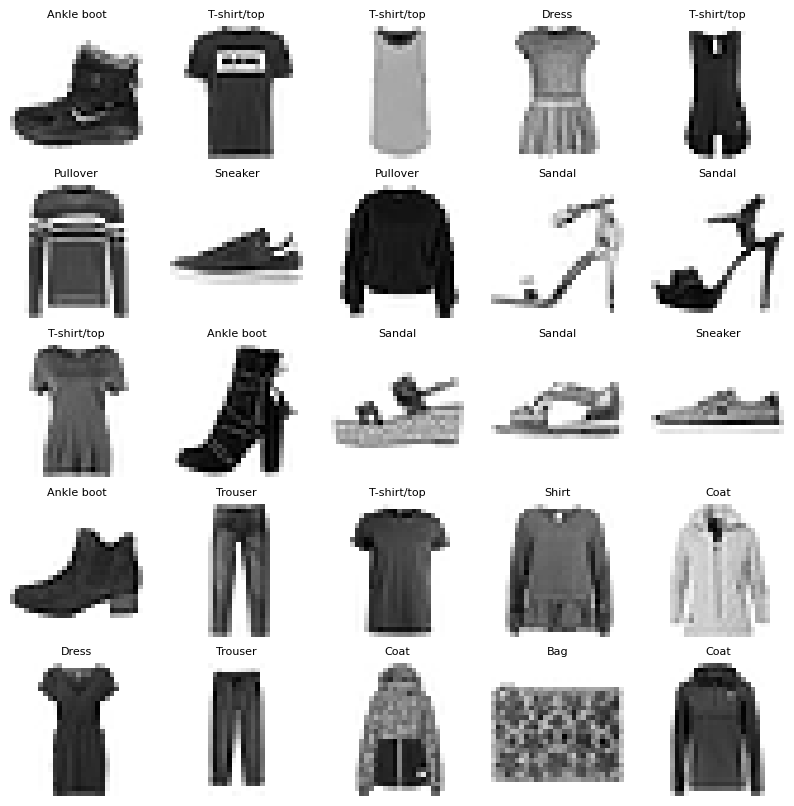

In [7]:
plt.figure(figsize=(10,10))

for img in range(25):
    plt.subplot(5, 5, img+1) # 5x5 is compatible with 25 image grid
    plt.imshow(-X_train[img], cmap='gray') #using negative to get the colors reversed for visualization purposes
    plt.title(train_label['clothing_name'][img], fontsize=8)
    plt.axis('off')

- It's recommended to validate the data quality before building and training the model. The data above looks good.
- Let's also check the distribution of the labels to make sure we don't have imbalanced data as it could impact the accuracy of the minority class.

Text(0, 0.5, 'Frequency')

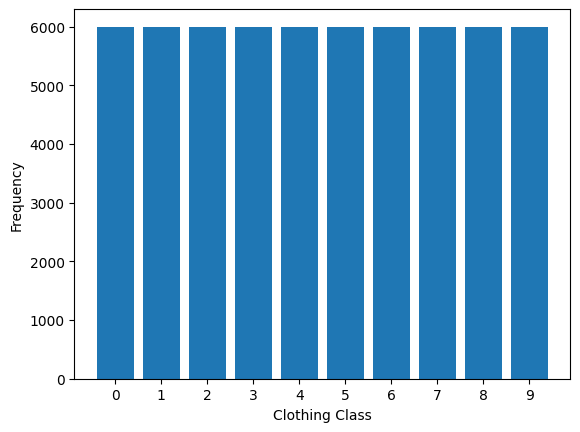

In [8]:
plt.hist(y_train,bins=np.arange(11)-0.5, rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Clothing Class')
plt.ylabel('Frequency')

## Step 2: Building The Neural Network with Different Styles

Architecture:
- Input and Flatten layers
- Hidden Layer 1: 80 neurons with ReLU
- Hidden Layer 2: 160 neurons with ReLU
- Output Layer: 10 neurons with Softmax

### Style 1-A: **Sequential** with Listed Components

In [9]:
nn_model = models.Sequential([
            layers.Input(shape=(28,28)),
            layers.Flatten(),
            layers.Dense(80, activation='relu', name='hidden_layer_1'),
            layers.Dense(160, activation='relu', name='hidden_layer_2'),
            layers.Dense(10, activation='softmax', name='output_layer')
            ])

### Style 1-B: **Sequential** with Appended List

- Build a blank sequential item
- Add elements in the subsequent rows

In [9]:
nn_model = models.Sequential() # build a blank list

nn_model.add(layers.Input(shape=(28,28)))
nn_model.add(layers.Flatten())
nn_model.add(layers.Dense(80, activation='relu', name='hidden_layer_1'))
nn_model.add(layers.Dense(160, activation='relu', name='hidden_layer_2'))
nn_model.add(layers.Dense(10, activation='softmax', name='output_layer'))

The main advantage of Style 2 is modularity. For example, suppose we want to build a paramater that controls the complexity of the NN:

In [10]:
#parameter
complexity_score = 8

nn_model = models.Sequential() 

nn_model.add(layers.Input(shape=(28,28)))
nn_model.add(layers.Flatten())
nn_model.add(layers.Dense(80, activation='relu', name='hidden_layer_1'))

if complexity_score > 5:
    nn_model.add(layers.Dense(300, activation='relu', name='hidden_layer_2'))
    nn_model.add(layers.Dense(250, activation='relu', name='hidden_layer_3'))
else:
    nn_model.add(layers.Dense(160, activation='relu', name='hidden_layer_2'))

nn_model.add(layers.Dense(10, activation='softmax', name='output_layer'))

### Style 2: **Functional API**

In [10]:
#input layer
my_inputs = layers.Input(shape=(28,28))

#flattening layer joined with input
fl = (layers.Flatten())(my_inputs)

# hidden layers
h1 = (layers.Dense(80, activation='relu', name='hidden_layer_1'))(fl)
h2 = (layers.Dense(160, activation='relu', name='hidden_layer_2'))(h1)

#output layer
my_outputs = (layers.Dense(10, activation='softmax', name='output_layer'))(h2)

#put all the pieces together in the model
nn_model = models.Model(inputs=my_inputs, outputs=my_outputs)


Comparison between Sequential and Functional:
- Functional API:
    - Pros:
        - Provides more modularity - ability to rearrange the model components and order
        - Allows for complex network architecture
        - Handles multi input/output
    - Cons: more code and hard to read

- Sequential:
    - Pros:
        - Easy to implement
        - Small learning curve
        - Less code
    - Cons: Limited flexibility compared to Functional with linear stack of layers

#### Example of Functional API Modularity

Define Static Components

In [ ]:
# hidden layers
h1 = (layers.Dense(80, activation='relu', name='hidden_layer_1'))(fl)
h2 = (layers.Dense(160, activation='relu', name='hidden_layer_2'))(h1)
h3 = (layers.Dense(320, activation='relu', name='hidden_layer_3'))(h2)

Define Dynamic Components

In [ ]:
#input layer
my_inputs_low = layers.Input(shape=(28,28)) # image style 1 
my_inputs_high = layers.Input(shape=(300,300)) # image style 2

#flattening layer joined with input
fl_low = (layers.Flatten())(my_inputs_low)
fl_high = (layers.Flatten())(my_inputs_high)

#output layer
my_outputs_low_10 = (layers.Dense(10, activation='softmax', name='output_layer'))(h2)
my_outputs_high_3 = (layers.Dense(10, activation='softmax', name='output_layer'))(h3)


after defining the components, we apply 2 integration architectures

In [ ]:
nn_model_low = models.Model(inputs=my_inputs_low, outputs=my_outputs_low_10)
nn_model_high = models.Model(inputs=my_outputs_low_10, outputs=my_outputs_high_3)

> Note: we'll be using the model defined from Style 2 (Functional)

In [30]:
nn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 80)             │        62,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 160)            │        12,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,370 (302.23 KB)

 Trainable params: 77,370 (302.23 KB)

 Non-trainable params: 0 (0.00 B)

## Step 3: Compiling And Training The Model

- We'll be using the default hyperparameters for the loss function and customize the ones for the optimizer (learning_rate)
- The learning rate is an important hyperparameter that controls the step size at which the model's weights are updated to reach the global minima in the direction of minimizing the loss function.
- Keras documentation recommend starting with 0.001 value and then test other values to fine tune.

![LR](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

In [11]:
#using default for loss function
loss_fn = 'sparse_categorical_crossentropy'

#customize the optimizer
from tensorflow.keras import optimizers
opt_algo = optimizers.Adam(learning_rate=0.001)

In [12]:
nn_model.compile(optimizer=opt_algo,
                 loss=loss_fn,
                 metrics=['accuracy'])

In [13]:
nn_model.fit(X_train, y_train, epochs=12, validation_split=0.2, batch_size=24)

Epoch 1/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - accuracy: 0.7739 - loss: 0.6493 - val_accuracy: 0.8598 - val_loss: 0.3869
Epoch 2/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.8599 - loss: 0.3878 - val_accuracy: 0.8393 - val_loss: 0.4256
Epoch 3/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.8713 - loss: 0.3406 - val_accuracy: 0.8641 - val_loss: 0.3675
Epoch 4/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.8834 - loss: 0.3124 - val_accuracy: 0.8643 - val_loss: 0.3738
Epoch 5/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8902 - loss: 0.2909 - val_accuracy: 0.8733 - val_loss: 0.3416
Epoch 6/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.8937 - loss: 0.2797 - val_accuracy: 0.8807 - val_loss: 0.3377
Epoch 7/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.8998 - loss: 0.2667 - val_accuracy: 0.8734 - val_loss: 0.3499
Epoch 8/12
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.9037 -

## Evaluation

In [14]:
nn_model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8842 - loss: 0.3440


[0.34806060791015625, 0.8862000107765198]

In [17]:
predictions = nn_model.predict(X_test)
predictions[:2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step


array([[1.0544125e-07, 1.2433155e-07, 1.0063401e-08, 1.9827304e-10,
        9.7709867e-09, 1.8877933e-04, 7.0889357e-08, 1.6015291e-02,
        7.7182172e-09, 9.8379558e-01],
       [1.5807536e-06, 1.2557273e-14, 9.9819332e-01, 4.2799950e-09,
        1.0643749e-03, 1.1758229e-11, 7.4073492e-04, 2.0518217e-13,
        1.5679868e-08, 3.2544697e-14]], dtype=float32)

In [18]:
tf.math.argmax(predictions[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:
from sklearn.metrics import 

## Bonus:  Functional API with Defined Function

In [ ]:
def build_model_with_functional_api(input_shape,layer_c_n, complexity_score):
  # input layer
  my_input = layers.Input(shape=input_shape)

  a = (Flatten())(my_input)

  #hidden layer
  b = (Dense(80, activation='relu', name='1st_hidden_layer'))(a)
  c = (Dense(layer_c_n, activation='relu', name='2nd_hidden_layer'))(b)
  
  if complexity_score > 5:
    print('The model is complex and needs a large NN')
    d = (Dense(200, activation='relu', name='3rd_hidden_layer'))(c)
    #output layer
    my_output = (Dense(10, activation='softmax', name='output_layer'))(d)

  else:
    #output layer
    my_output = (Dense(10, activation='softmax', name='output_layer'))(c)


  #put all the components together
  nn_model = models.Model(inputs=my_input, outputs=my_output)

  return nn_model
